-126.20756485292436 -129.52959596032872 -135.25147638811114 -140.63204033849823


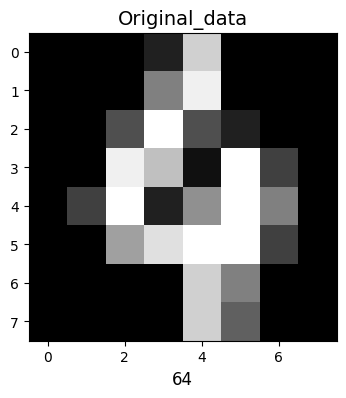

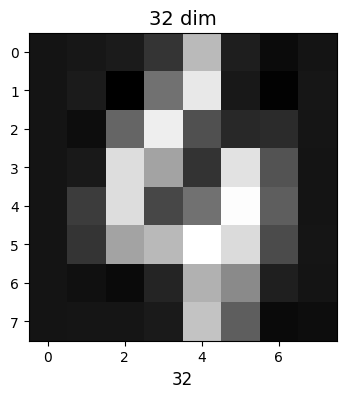

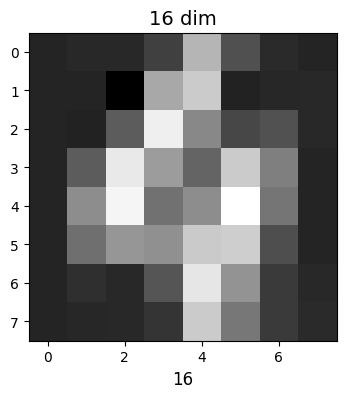

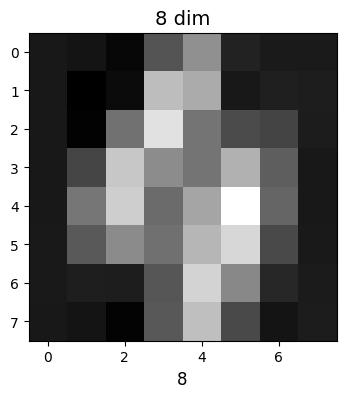

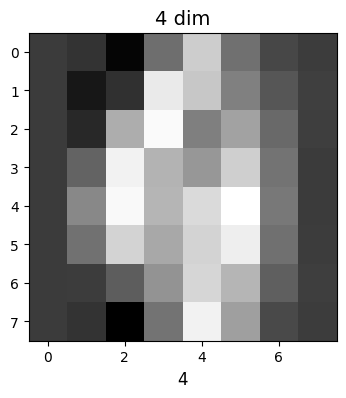

In [23]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt

"""
    1. digits 데이터를 불러오는
       load_data() 함수를 구현합니다.
"""
def load_data():
    X,y = load_digits(return_X_y = True)
    
    return X, y

"""
    2. PCA 알고리즘을 활용하여 차원을 축소하고,
       다시 이미지로 복원한 결과를 확인하기 위한
       train_PCA_and_restore_image() 함수를 구현합니다.
       
       Step01. dim_reduction_number개의 차원으로 축소하는 
               PCA 모델을 생성합니다.
       
       Step02. 생성한 PCA 모델을 이용하여 차원 축소를 진행합니다.
       
       Step03. 축소된 데이터를 다시 이미지 데이터로 복원합니다.
       
       Step04. 축소된 이미지의 log-likelihood를 통해 점수를 확인합니다.
"""
def train_PCA_and_restore_image(dim_reduction_number, images): 
    pca = PCA(n_components = dim_reduction_number)
    X_pca = pca.fit_transform(images)   
    approxOriginal = pca.inverse_transform(X_pca) 
    score = pca.score(approxOriginal)
    return approxOriginal,score
    
"""
digit 이미지를 시각화합니다.
"""
def visualize(X, x_label, title):
    
    plt.figure(figsize=(5,4));
    n_data = 100
    
    plt.imshow(X[n_data].reshape(8, 8),
                  cmap = plt.cm.gray, interpolation='nearest')
    plt.xlabel(x_label, fontsize = 12)
    plt.title(title, fontsize = 14)
    
"""
    3. 구현한 함수를 활용하여 차원 축소를 진행하고
       시각화해주는 main() 함수를 완성합니다.
"""
def main():
    
    X,y = load_data()
    
    # 차원 축소와 이미지 복원 진행하기
    reduced_image_32, score_32 = train_PCA_and_restore_image(dim_reduction_number=32, images=X)
    reduced_image_16, score_16 = train_PCA_and_restore_image(dim_reduction_number=16, images=X)
    reduced_image_8, score_8 = train_PCA_and_restore_image(dim_reduction_number=8, images=X)
    reduced_image_4, score_4 = train_PCA_and_restore_image(dim_reduction_number=4, images=X)
    
    # 시각화 함수 호출하기
    visualize(X, '64', 'Original_data')
    visualize(reduced_image_32, '32', '32 dim')
    visualize(reduced_image_16, '16', '16 dim')
    visualize(reduced_image_8, '8', '8 dim')
    visualize(reduced_image_4, '4', '4 dim')
    print(score_32,score_16,score_8,score_4)
if __name__ == '__main__':
    main()